In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme()

In [1]:
def plot_metric(vali, train, figname="", ylabel="",labels=['Validação', 'Treinamento']):
    fig, ax = plt.subplots(figsize=(6,4))
    x = np.arange(len(vali))
    ax.plot(x, vali, label=labels[0])
    ax.plot(x, train, label=labels[1])
    ax.set_xlabel("Épocas")
    ax.set_ylabel("{}".format(ylabel))
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.savefig("figuras/{}.pdf".format(figname))
    plt.clf()
    plt.close()

def get_results(exp_name):
    scores_training = np.load("results/{}/losses_training.npy".format(exp_name)).mean(axis=0)
    scores_vali = np.load("results/{}/losses_vali.npy".format(exp_name)).mean(axis=0)

    accs_training = np.load("results/{}/accs_training.npy".format(exp_name)).mean(axis=0)
    accs_vali = np.load("results/{}/accs_vali.npy".format(exp_name)).mean(axis=0)

    return scores_training, scores_vali, accs_training, accs_vali

def plot_comparacao(dict_valores, size_valores=50, ylabel="", figname=""):
    fig, ax = plt.subplots(figsize=(5,3.5))
    x = np.arange(size_valores)
    for k in dict_valores:
        ax.plot(x,dict_valores[k], label=k)
    ax.set_xlabel("Épocas", fontdict={"fontsize":13})
    ax.set_ylabel("{}".format(ylabel),fontdict={"fontsize":13})
    plt.legend()
    plt.tight_layout()
    plt.savefig("figuras/{}.pdf".format(figname))
    plt.show()
    plt.clf()
    plt.close()  

# Comparações

## Iris dataset

In [3]:
sti, svi, ati, avi = get_results('iris_baseline')
st, sv, at, av = get_results('iris_ga')
pso_sti, pso_svi, pso_ati, pso_avi = get_results('iris_pso')

### Loss

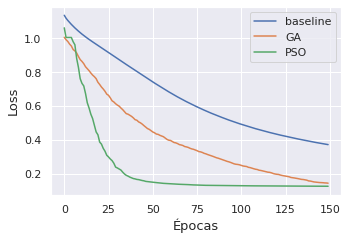

In [4]:
dict_iris = {'baseline':sti, 'GA':st, 'PSO':pso_sti}
plot_comparacao(dict_iris,150,'Loss', figname="iris_loss")

### Acurácia

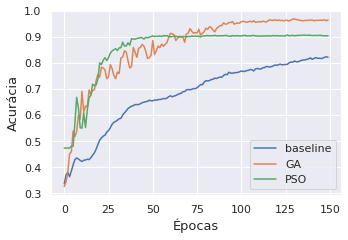

In [69]:
dict_iris_acc = {'baseline':ati, 'GA':at, 'PSO':pso_ati}
plot_comparacao(dict_iris_acc,150,'Acurácia', figname="iris_acc")

## Wine dataset

In [61]:
stw, svw, atw, avw = get_results('wine_baseline')
st_wine, sv_wine, at_wine, av_wine = get_results('wine_ga')
pso_stw, pso_svw, pso_atw, pso_avw = get_results('wine_pso')

### Loss

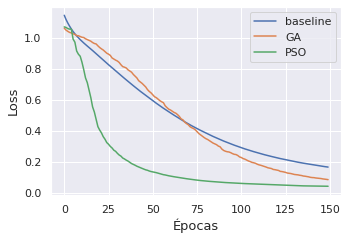

In [62]:
dict_wine = {'baseline':stw, 'GA':st_wine, 'PSO':pso_stw}
plot_comparacao(dict_wine,150,'Loss', figname="wine_loss")

### Acurácia

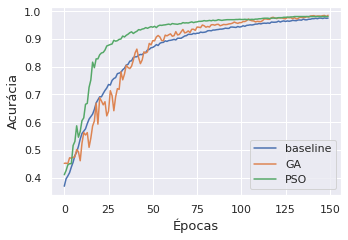

In [68]:
dict_wine_acc = {'baseline':atw, 'GA':at_wine, 'PSO':pso_atw}
plot_comparacao(dict_wine_acc, 150,'Acurácia', figname="wine_acc")

## Breast dataset

In [63]:
stb, svb, atb, avb = get_results('breast_baseline')
sga_b, sga_vb, agatb, agavb= get_results("breast_ga")
pso_stb, pso_svb, pso_atb, pso_avb = get_results('breast_pso')

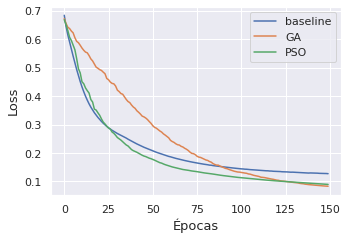

In [64]:
dict_breast = {'baseline':stb, 'GA':sga_b, 'PSO':pso_stb}
plot_comparacao(dict_breast,150,'Loss', figname="breast_loss")

### Acurácia

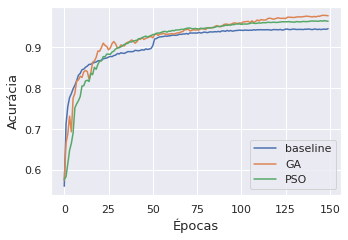

In [67]:
dict_breast_acc = {'baseline':atb, 'GA':agatb, 'PSO':pso_atb}
plot_comparacao(dict_breast_acc, 150,'Acurácia', figname="breast_acc")